In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import cv2
import mediapipe as mp

In [3]:
# Ruta del archivo .npz
file_path = r'C:\Users\Usuario\Documents\2024-1\Machine Learning\Parcial final\env\entornovirtual\mnist-data (1).npz'

# Cargar el conjunto de datos MNIST
with np.load(file_path) as data:
    print(data.files)  # Esto imprimirá las claves disponibles en el archivo
    X_train = data['training_data']
    y_train = data['training_labels']
    X_test = data['test_data']
    # Como no hay etiquetas de prueba, dividiremos el conjunto de entrenamiento para obtener un conjunto de prueba.
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=20000, random_state=42)

# Mostrar la forma de los datos
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('X_test shape:', X_test.shape)

# Aplanar las imágenes de 28x28 a 784 (28*28) características
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train)
X_val_pca_2d = pca_2d.transform(X_val)

['training_data', 'test_data', 'training_labels']
X_train shape: (20000, 1, 28, 28)
y_train shape: (20000,)
X_val shape: (40000, 1, 28, 28)
y_val shape: (40000,)
X_test shape: (10000, 1, 28, 28)


In [4]:


# Crear el clasificador SVM
svm_clf = SVC(kernel='linear', C=1)

# Entrenar el modelo
svm_clf.fit(X_train_pca, y_train)

# Predecir con el modelo en el conjunto de validación
y_val_pred = svm_clf.predict(X_val_pca)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Mostrar el reporte de clasificación
class_report = classification_report(y_val, y_val_pred)
print("Reporte de Clasificación:\n", class_report)

In [ ]:
# Crear el clasificador SVM
svm_clf = SVC(kernel='linear', C=1)

# Entrenar el modelo en los datos reducidos a 2D
svm_clf.fit(X_train_pca_2d, y_train)

# Predecir con el modelo en el conjunto de validación
y_val_pred = svm_clf.predict(X_val_pca_2d)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Mostrar el reporte de clasificación
class_report = classification_report(y_val, y_val_pred)
print("Reporte de Clasificación:\n", class_report)

# Visualización del hiperplano y los datos
h = .02  # tamaño del paso en la malla
x_min, x_max = X_train_pca_2d[:, 0].min() - 1, X_train_pca_2d[:, 0].max() + 1
y_min, y_max = X_train_pca_2d[:, 1].min() - 1, X_train_pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir las etiquetas para cada punto en la malla
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Trazar el contorno y los puntos de entrenamiento y validación
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=20, label='Train')
plt.scatter(X_val_pca_2d[:, 0], X_val_pca_2d[:, 1], c=y_val, edgecolors='k', marker='x', s=50, label='Validation')
plt.title('SVM con Kernel Lineal y PCA (2 Componentes)')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend()
plt.show()

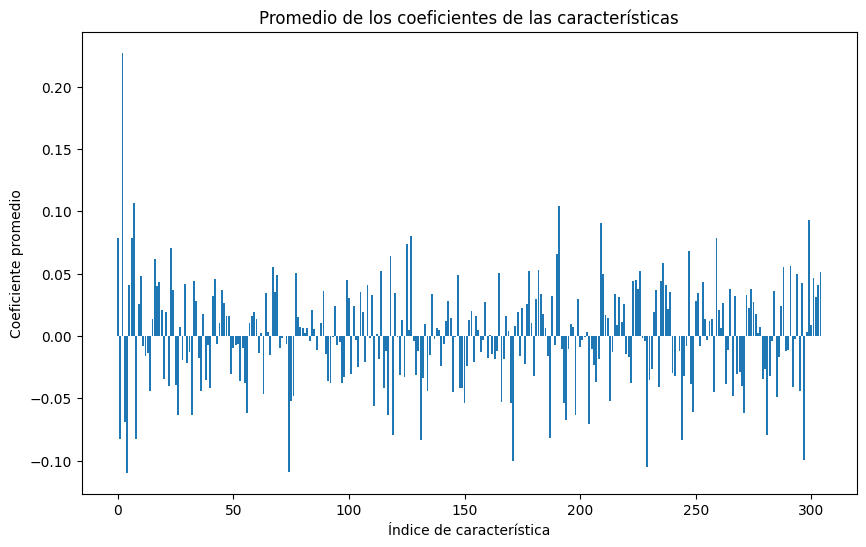

In [4]:
# Calcular el promedio de los coeficientes para cada característica
coefficients = svm_clf.coef_
mean_coefficients = np.mean(coefficients, axis=0)

# Visualizar los promedios de los coeficientes
plt.figure(figsize=(10, 6))
plt.bar(range(len(mean_coefficients)), mean_coefficients)
plt.xlabel('Índice de característica')
plt.ylabel('Coeficiente promedio')
plt.title('Promedio de los coeficientes de las características')
plt.show()


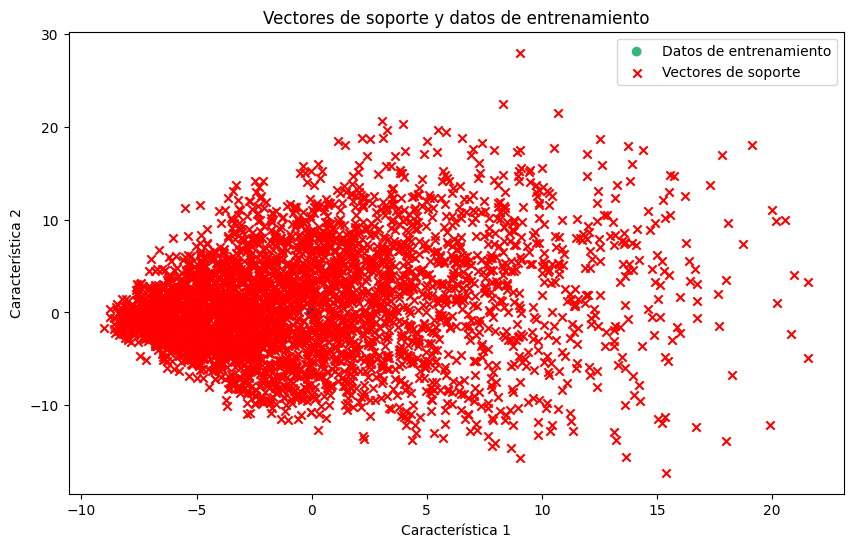

In [5]:
# Obtener los vectores de soporte
support_vectors = svm_clf.support_vectors_

# Visualizar los vectores de soporte y los datos de entrenamiento
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Datos de entrenamiento')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='red', marker='x', label='Vectores de soporte')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Vectores de soporte y datos de entrenamiento')
plt.legend()
plt.show()


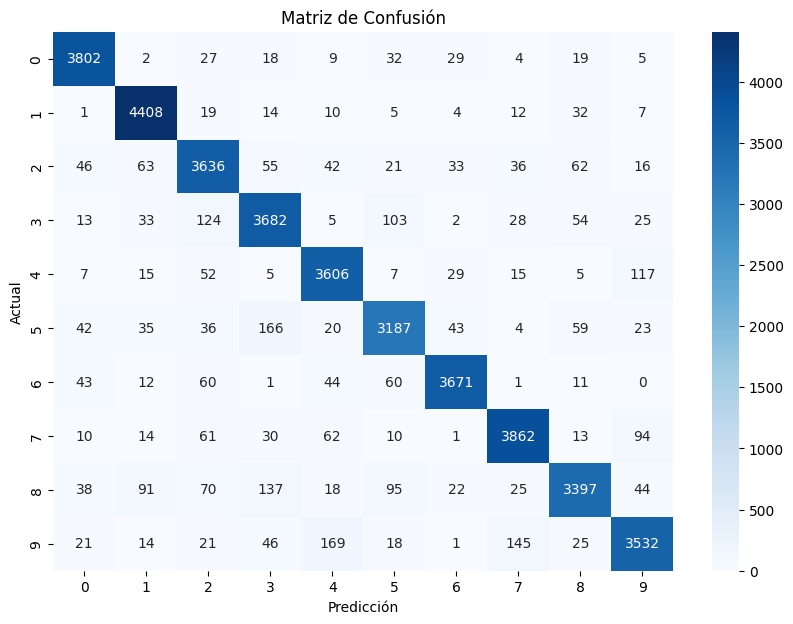

In [6]:
import seaborn as sns

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [7]:


# Función para cambiar el modo de operación al presionar la tecla 'w'
def toggle_mode(key):
    global mode
    if key == ord('w'):
        mode = 1 if mode == 2 else 2  # Alternar entre modo 1 y modo 2

# Función para detectar y clasificar imágenes o dibujos realizados con la mano
def process_image(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
    flattened = resized.flatten().reshape(1, -1)
                
    # Estandarizar los datos utilizando el scaler ajustado
    standardized = scaler.transform(flattened)
                
    # Transformar los datos con PCA
    pca_transformed = pca.transform(standardized)
                
    # Hacer la predicción
    prediction = svm_clf.predict(pca_transformed)
    return prediction[0]



In [28]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
mode = 1  # Modo de operación inicial: identificación de imágenes (modo 1)
is_drawing = False  # Variable para controlar si se está dibujando con la mano
reset_drawing = False  # Variable para resetear el dibujo
drawing_image = None

# Configuración de la cámara para capturar imágenes en tiempo real
def real_time_classification():
    global drawing_image, is_drawing, reset_drawing
    url = 'http://192.168.217.123/400x296.jpg'  # La URL debe apuntar a un flujo de video en tiempo real

    cap = cv2.VideoCapture(url)  # Crear objeto VideoCapture

    if not cap.isOpened():
        print("Error: No se puede acceder a la cámara.")
        return

    with mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5) as hands:
        while True:
            cap.open(url)  # antes de capturar el frame abrimos la url
            ret, frame = cap.read()

            if not ret:
                break
            
            # Cambiar el modo de operación si se presiona la tecla 'w'
            key = cv2.waitKey(1)
            toggle_mode(key)

            if mode == 1:  # Modo 1: Identificación de imágenes
                prediction = process_image(frame)
                cv2.putText(frame, f'Prediction: {prediction}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
                cv2.imshow('Frame', frame)

            elif mode == 2:  # Modo 2: Detección y clasificación de la mano
                if reset_drawing or drawing_image is None:
                    drawing_image = np.zeros_like(frame)
                    reset_drawing = False

                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = hands.process(frame_rgb)

                if results.multi_hand_landmarks is not None:
                    for hand_landmarks in results.multi_hand_landmarks:
                        mp_drawing.draw_landmarks(
                            frame, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(0, 255, 255), thickness=3, circle_radius=5),
                            mp_drawing.DrawingSpec(color=(255, 0, 255), thickness=4, circle_radius=5))

                        # Obtener la posición del índice (landmark 8)
                        index_finger_tip = hand_landmarks.landmark[8]
                        h, w, _ = frame.shape
                        cx, cy = int(index_finger_tip.x * w), int(index_finger_tip.y * h)

                        if key == ord('i'):
                            is_drawing = True
                        elif key == ord('v'):
                            is_drawing = False
                        elif key == ord('x'):
                            drawing_image = np.zeros_like(frame)
                        elif key == ord('p'):
                            drawing = drawing_image.copy()
                            prediction = process_image(drawing)
                            cv2.putText(drawing_image, f'Prediction: {prediction}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

                        if is_drawing:
                            cv2.circle(drawing_image, (cx, cy), 5, (255, 255, 255), -1)

                combined_frame = cv2.addWeighted(frame, 0.5, drawing_image, 0.5, 0)
                cv2.imshow('Frame', combined_frame)

            # Salir del bucle al presionar 'q'
            if key == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

# Ejecutar la clasificación en tiempo real
real_time_classification()


Error: No se puede acceder a la cámara.
